In [2]:
import torch
import numpy as np

np.set_printoptions(precision=3)

# creating a tensor from list or numpy array
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


### Creating a tensor
- torch.ones()
- torch.rand()

In [7]:
# one tensor
t_ones = torch.ones(2, 3)
t_ones.shape

# random tensor
rand_tensor = torch.rand(2, 3)
print(rand_tensor)
rand_tensor_2 = torch.rand((2, 3))
print(rand_tensor_2)

tensor([[0.6396, 0.4050, 0.9511],
        [0.3692, 0.2684, 0.4280]])
tensor([[0.7920, 0.9493, 0.9969],
        [0.1535, 0.8368, 0.5453]])


### Transposing, reshaping and squeezing
- torch.transpose(t, dim_1, dim_2)
- torch.reshape(t, size(dim_1, dim_2))
- torch.squeeze(t, dim)

In [13]:
# transpose a tensor
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
# print(t.shape, '--->', t_tr.shape)

# reshaping a tensor
t = torch.zeros(30)
t_reshap = torch.reshape(t, (5, 6))
t_res_tuple = t.reshape((5,6))
t_res_list = t.reshape(5, 6)
# print(t.shape)
# print(t_reshap.shape)
# print(t_res_tuple.shape)
# print(t_res_list.shape)

# squeezing a tensor
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


### Applying math operations to tensors
- torch.multiply(t1, t2)
- torch.matmul(t1, t2)
- torch.mean(t, dim)
- torch.std(t, dim)
- torch.linalg.norm(t, ord, dim)

In [29]:
# two random tensors, one from uniform dist, one from standard gaussian
torch.manual_seed(1)
t1 = 2 * torch.rand((5, 2)) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

# Element-wise product
t3 = torch.multiply(t1, t2)
# print(t3)

# mean/sum/std along a specified axis
# t4 = torch.mean(t1, axis=0)
t4 = torch.std(t2, axis=0)
# print(t4)

# matmul
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t6)

# L^p norm of a tensor
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)
# verify the results
np_norm = np.sqrt(np.sum(np.square(t1.numpy()), axis=1))
print(np_norm)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])
tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])
tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])
[0.678 0.508 1.116 0.549 0.185]


### Split, stack and concatenate tensors
- torch.chunk()
- torch.split()
- torch.cat([lst_tensors], axis)
- 

In [32]:
torch.manual_seed(1)
t = torch.rand(8)
print(t)

t_splits = torch.chunk(t, 3)
print(t_splits)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999, 0.3971, 0.7544])
(tensor([0.7576, 0.2793, 0.4031]), tensor([0.7347, 0.0293, 0.7999]), tensor([0.3971, 0.7544]))


In [33]:
t = torch.rand(5)
print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
print(t_splits)

tensor([0.5695, 0.4388, 0.6387, 0.5247, 0.6826])
(tensor([0.5695, 0.4388, 0.6387]), tensor([0.5247, 0.6826]))


In [45]:
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)

A = torch.ones(3)
B = torch.zeros(3)
C = torch.stack([A, B], axis=0)
print(C)

A = torch.ones(3)
B = torch.zeros(3)
C = torch.stack([A, B], axis=1)
print(C)


tensor([1., 1., 1., 0., 0.])
tensor([[1., 1., 1.],
        [0., 0., 0.]])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## Building data input pipelines
- Dataset
- DataLoader

### Creating a pytorch DataLoader from existing tensors

In [49]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

# for item in data_loader:
#     print(item)

data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


### Combining two tensors into a joint dataset
- A custom dataset must contain the following methods:
    - __init__()
    - __getitem__()

In [52]:
torch.manual_seed(1)
t_x = torch.rand((4, 3), dtype=torch.float32)
t_y = torch.arange(4)

from torch.utils.data import Dataset
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [53]:
joint_dataset = JointDataset(t_x, t_y)
for example in joint_dataset:
    print('x: ', example[0], ' y: ', example[1])

x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


### Shuffle, batch and epochs

In [54]:
torch.manual_seed(1)

# Shuffle and load data
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}', 'x: ', batch[0], '\n y: ', batch[1])

batch 1 x:  tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
 y:  tensor([2, 0])
batch 2 x:  tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
 y:  tensor([1, 3])


In [55]:
# load multiple epochs
for epoch in range(2):
    print(f'Epoch {epoch + 1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], '\n y:', batch[1])


Epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
 y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
 y: tensor([1, 3])
Epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
 y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
 y: tensor([0, 1])


### Creating dataset with files
- Module: PIL.Image
- Module: torchvision.transforms

In [57]:
import pathlib
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in
                    imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


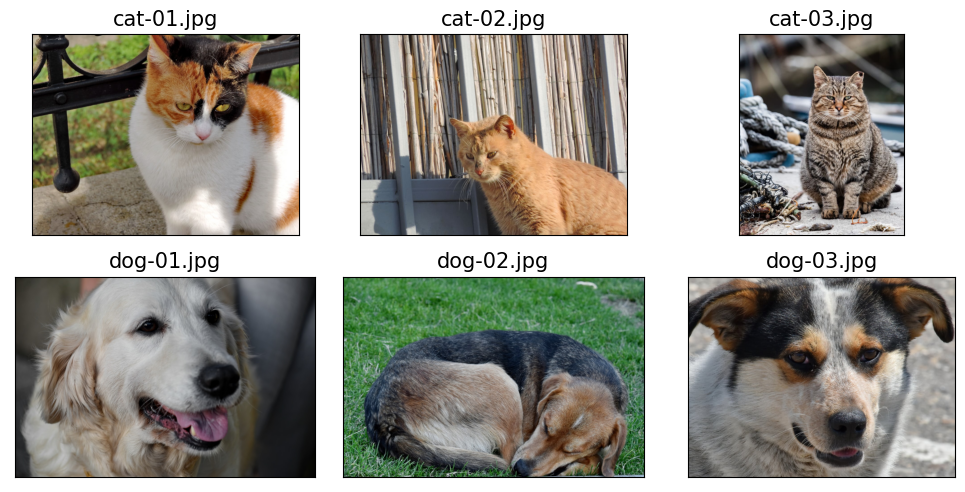

In [58]:
# Visualize images
import matplotlib.pyplot as plt
import os
from PIL import Image
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [59]:
# Extract label names
labels = [1 if 'dog' in
          os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [61]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, index):
        file = self.file_list[index]
        img = Image.open(file)
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
# image_dataset = ImageDataset(file_list, labels)

# for file, label in enumerate(image_dataset):
#     print(file, label)

#### Preprocessing, resizing

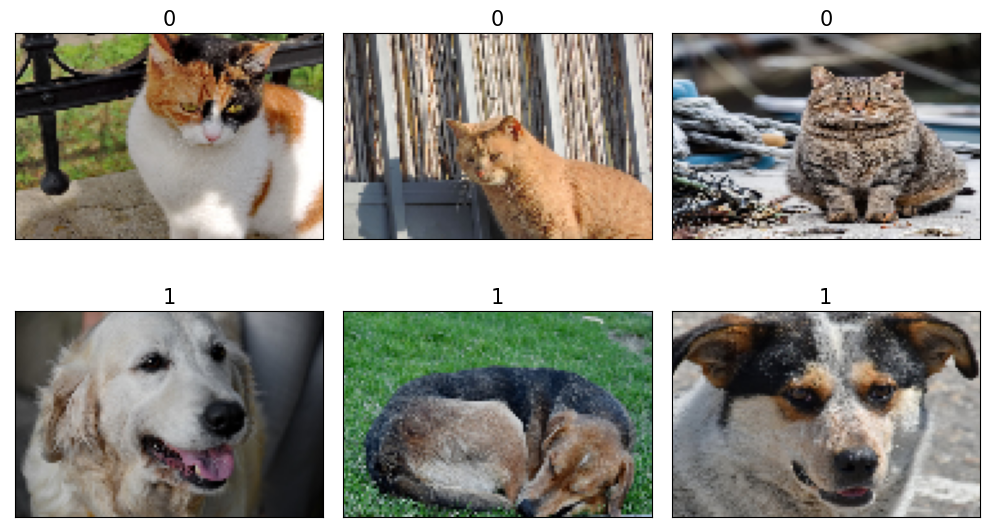

In [63]:
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width))
])

image_dataset = ImageDataset(file_list, labels, transform)

# Visualize
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

### Freely available datasets in pytorch
- torchvision.datasets contains datasets for images
- torchtext.datasets contains datasets for natural languages

#### Working with CelebA dataset

In [73]:
import torchvision
image_path = './Data/'
celeba_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=False)

In [74]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [75]:
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x27E48EB7BE0>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


C:\Users\cheny\AppData\Local\Temp\ipykernel_41292\2367830562.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


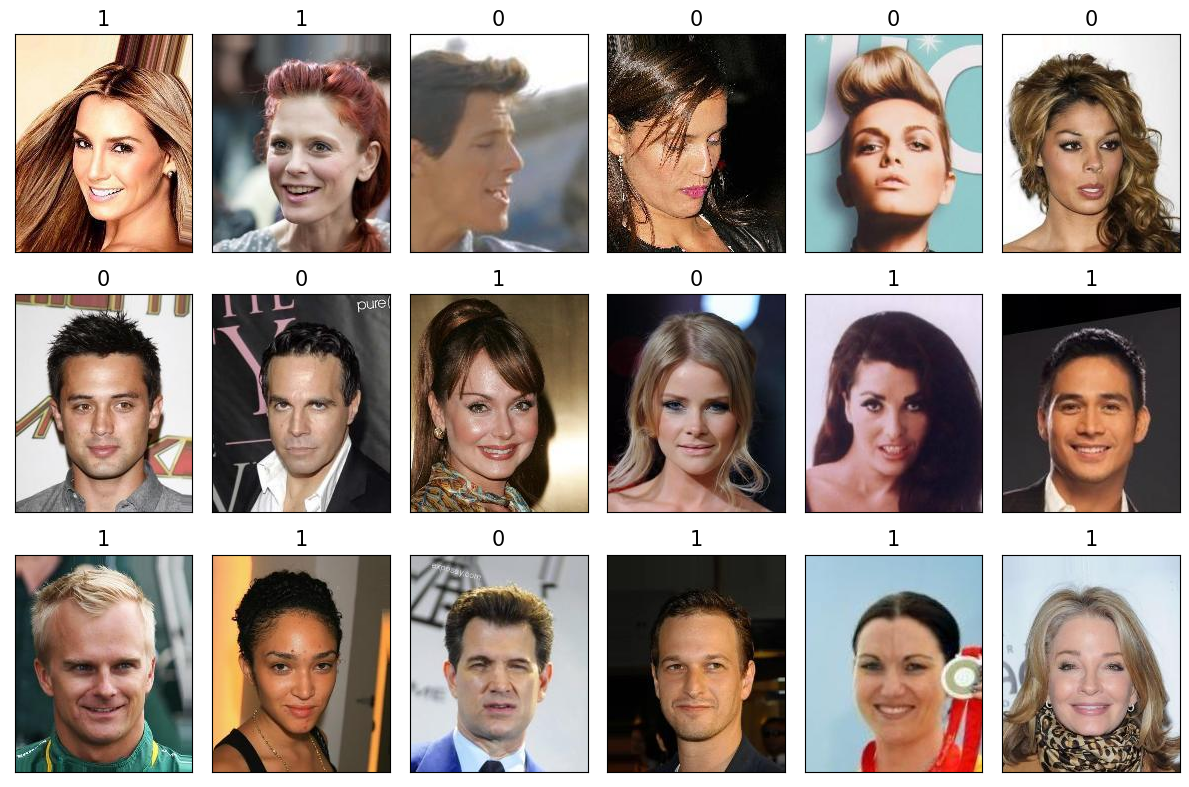

In [77]:
# Visualize first 18 samples
from itertools import islice
fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)

fig.tight_layout()
fig.show()

In [78]:
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

8.3%

100.0%


Extracting ./Data/MNIST\raw\train-images-idx3-ubyte.gz to ./Data/MNIST\raw



100.0%

Extracting ./Data/MNIST\raw\train-labels-idx1-ubyte.gz to ./Data/MNIST\raw




100.0%
100.0%

Extracting ./Data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./Data/MNIST\raw

Extracting ./Data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./Data/MNIST\raw



In [79]:
assert isinstance(mnist_dataset, torch.utils.data.Dataset)

In [80]:
example = next(iter(mnist_dataset))
print(example)

(<PIL.Image.Image image mode=L size=28x28 at 0x27E46A361F0>, 5)


C:\Users\cheny\AppData\Local\Temp\ipykernel_41292\4174974087.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


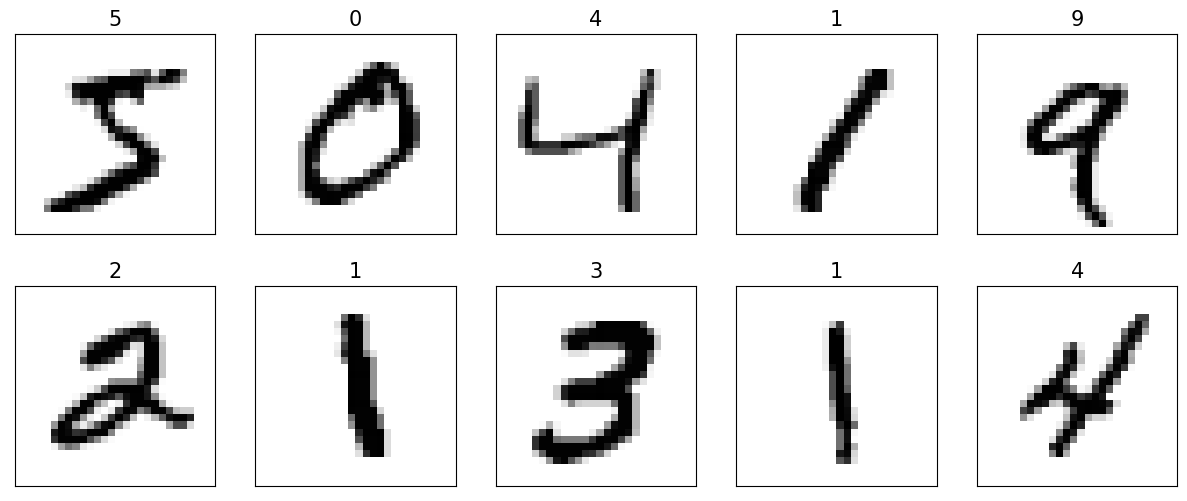

In [81]:
# Visualize first 10 samples
from itertools import islice
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

fig.show()